## Funções 

In [1]:
def destructuringFrequencyTable(tabela, nomeIntervalo, nomeFrequencia):
    """
        Define o ponto médio, os intervalos e a frequência da tabela 
        de distribuição de frequência.
    """
    pontoMedio = []
    intervalos = []
    frequencia = []
    for i in range(0, len(tabela)):
      intervalo = tabela[nomeIntervalo][i].split('|---')
      for lado in range(0, len(intervalo)):
        intervalo[lado] = intervalo[lado].strip()
      try:
        esquerda = float(intervalo[0])
        direita = float(intervalo[1])
        numeroMulheres = int(tabela[nomeFrequencia][i])

        soma = esquerda + direita
        pontoMedio.append(soma/2)
        intervalos.append([esquerda, direita])
        frequencia.append(numeroMulheres)
      except ValueError:
        print("Somente números são aceitos.")
        return
    
    xm_fi = []
    xm2 = []
    xm2_fi = []
    fAc = 0
    frequencia_Acumulada = []
    for i in range(0, len(pontoMedio)):
        xm_fi.append(frequencia[i] * pontoMedio[i])
        xm2.append(pontoMedio[i] * pontoMedio[i])
        xm2_fi.append(xm2[i] * frequencia[i])
        
        frequencia_Acumulada.append(fAc + frequencia[i])
        fAc = fAc + frequencia[i]
    
    pontosTabela = dict({
    'intervalos': intervalos, 
    'frequencia': frequencia, 
    'pontoMedio': pontoMedio, 
    'xm_fi': xm_fi,
    'xm2': xm2,
    'xm2_fi': xm2_fi,
    'frequencia_Acumulada': frequencia_Acumulada,
    })

    ultimoElementoFac = len(frequencia_Acumulada) - 1
    somaFrequencia = frequencia_Acumulada[ultimoElementoFac]
    somaXm_Fi = sum(xm_fi)
    somaXm2_Fi = sum(xm2_fi)

    somaTabela = dict({
        'somaFrequencia': somaFrequencia, 
        'somaXm_Fi': somaXm_Fi, 
        'somaXm2_Fi': somaXm2_Fi, 
    })
    
    return [pontosTabela, somaTabela]

### Medidas de Tendência Central

### Fórmulas utilizadas:

##### Moda
![moda](images/tendencia-central/modaDist.png)
![moda](images/tendencia-central/modaDist2.png)

##### Mediana
![mediana](images/tendencia-central/medianaDist.png)
![mediana](images/tendencia-central/medianaDist2.png)

##### Média
![media](images/tendencia-central/mediaDist.png)

In [2]:
def getTendenciaCentral(pontosTabela, somaTabela):
    
    frequencia = pontosTabela['frequencia']
    intervalos = pontosTabela['intervalos']
    frequencia_Acumulada = pontosTabela['frequencia_Acumulada']
    somaXm_Fi = somaTabela['somaXm_Fi']
    somaFrequencia = somaTabela['somaFrequencia']
    
    # Calculando a mediana da Classe
    medianaDaClasse = somaFrequencia/2

    # Encontrando a Classe da Mediana
    index = 0
    for i in range(0, len(frequencia_Acumulada)):
        if frequencia_Acumulada[i] > medianaDaClasse:
            index = i 
            break

    # Definindo o limite inferior da Classe
    limiteInferior = intervalos[index][0]

    # fac do anterior
    frequenciaAcumuladaAnterior = frequencia_Acumulada[index-1]

    # Frequência Absoluta do Intervalo
    frequenciaAbsoluta = frequencia[index]

    # Amplitude
    h = intervalos[index][1] - intervalos[index][0]

    mediana = limiteInferior + (
        (
            ((somaFrequencia/2) - frequenciaAcumuladaAnterior)/ frequenciaAbsoluta) * h
        )

    # D1 = frequência da classe modal - frequência da classe anteriot
    D1 = frequencia[index] - frequencia[index-1]

    # D2 = frequência da classe modal - frequência posterior
    D2 = frequencia[index] - frequencia[index+1]

    moda = limiteInferior + ((D1/(D1+D2))*h)
    
    # Média
    media = somaXm_Fi/somaFrequencia
    
    return [moda, mediana, media]

### Medidas de Dispersão

### Fórmulas utilizadas:

#### Variância

###### Populacional
![variancia](images/dispersao/desvioPopulacional2.png)

![variancia](images/dispersao/desvioPopulacional.png)

###### Amostral
![variancia](images/dispersao/desvioAmostral.png)

#### Desvio Padrão
raiz(variância)

#### Coeficiente de Variação
![cv](images/dispersao/coeficienteVariacao.png)

In [3]:
import math

def getMedidasDispersão(pontosTabela, somaTabela):
    
    somaXm_Fi = somaTabela['somaXm_Fi']
    somaXm2_Fi = somaTabela['somaXm2_Fi']
    somaFrequencia = somaTabela['somaFrequencia']
    media = somaXm_Fi/somaFrequencia
    pontoMedio = pontosTabela['pontoMedio']
    
    # Variância
    varianciaPopulacional = 1*(somaXm2_Fi - (math.pow(somaXm_Fi, 2)/somaFrequencia))/somaFrequencia
    
    varianciaAmostral = 1*(somaXm2_Fi - (math.pow(somaXm_Fi, 2)/somaFrequencia))/(somaFrequencia - 1)
    
    # Desvio Padrão
    desvioPopulacional = math.sqrt(varianciaPopulacional)
    
    desvioAmostral = math.sqrt(varianciaAmostral)
    
    # Coeficiente de Variação
    cvPopulacional = ((desvioPopulacional/media)*100)
    cvAmostral = ((desvioAmostral/media)*100)
    
    return [varianciaPopulacional, varianciaAmostral, desvioPopulacional, desvioAmostral, cvPopulacional, cvAmostral]

## **Questão 1** 
### Analisando a distribuição de frequência de mulheres, na faixa etária de 25 a 34 anos, segundo a pressão sistólica em milímetros de mercúrio.

In [4]:
# Tabela de distribuição de frequência inicial

import numpy as np
import pandas as pd

tabelaPressao = pd.DataFrame(np.array([['80 |--- 100', 30], 
                             ['100 |--- 120', 80],
                             ['120 |--- 140', 40],
                             ['140 |--- 160', 10],
                             ['160 |--- 180', 4],
                             ['180 |--- 200', 6],
                             ]), 
                columns=['Pressao_Siatolica', 'No._de_Mulheres(fi)'])
tabelaPressao

,Pressao_Siatolica,No._de_Mulheres(fi)
0,80 |--- 100,30
1,100 |--- 120,80
2,120 |--- 140,40
3,140 |--- 160,10
4,160 |--- 180,4
5,180 |--- 200,6


In [5]:
[pontosTabela, somaTabela] = destructuringFrequencyTable(tabelaPressao, 'Pressao_Siatolica', 'No._de_Mulheres(fi)')

In [6]:
tabelaPressao['Ponto_Medio(xm)'] = pontosTabela['pontoMedio']
tabelaPressao['xm_fi'] = pontosTabela['xm_fi']
tabelaPressao['xm2'] = pontosTabela['xm2']
tabelaPressao['xm2_fi'] = pontosTabela['xm2_fi']
tabelaPressao['fac'] = pontosTabela['frequencia_Acumulada']
tabelaPressao

,Pressao_Siatolica,No._de_Mulheres(fi),Ponto_Medio(xm),xm_fi,xm2,xm2_fi,fac
0,80 |--- 100,30,90.0,2700.0,8100.0,243000.0,30
1,100 |--- 120,80,110.0,8800.0,12100.0,968000.0,110
2,120 |--- 140,40,130.0,5200.0,16900.0,676000.0,150
3,140 |--- 160,10,150.0,1500.0,22500.0,225000.0,160
4,160 |--- 180,4,170.0,680.0,28900.0,115600.0,164
5,180 |--- 200,6,190.0,1140.0,36100.0,216600.0,170


In [7]:
questaoA = 0
intervalos = pontosTabela['intervalos']
frequencia = pontosTabela['frequencia']
somaFrequencia = somaTabela['somaFrequencia']


# a) A percentagem de mulheres que têm pressão igual ou maior que 120mm de Hg
for i in range(0, len(intervalos)):
  if intervalos[i][0] >= 120:
    questaoA += frequencia[i]
questaoA = questaoA / somaFrequencia
questaoA = questaoA * 100
print(f'Questão 1: letra A) {round(questaoA, 2)}%')

Questão 1: letra A) 35.29%


### Questão 1: letra A) 35.29%

In [8]:
questaoB = 0
# b) O número de mulheres que têm pressão menor que 160 mm de Hg.
for i in range(0, len(intervalos)):
  if (intervalos[i][1]-1) < 160:
    questaoB += frequencia[i]
print(f'Questão 1: letra B) {questaoB} Mulheres')

Questão 1: letra B) 160 Mulheres


### Questão 1: letra B) 160 Mulheres

In [9]:
questaoC = 0
# c) O número de mulheres (e a percentagem) que têm pressão igual ou maior que 100mm de Hg
for i in range(0, len(intervalos)):
  if intervalos[i][0] >= 100:
    questaoC += frequencia[i]
print(f'Questão 1: letra C parte 1) {questaoC} Mulheres')
questaoC = questaoC/somaFrequencia
questaoC = questaoC*100
print(f'Questão 1: letra C parte 2) {round(questaoC, 2)}%')

Questão 1: letra C parte 1) 140 Mulheres
Questão 1: letra C parte 2) 82.35%


### Questão 1: letra C parte 1) 140 Mulheres
### Questão 1: letra C parte 2) 82.35%

In [10]:
result = getTendenciaCentral(pontosTabela, somaTabela)
moda = result[0]
mediana = result[1]
media = result[2]

In [11]:
print(f'Questão 1: letra D) {round(moda, 2)}')

Questão 1: letra D) 111.11


### Questão 1: letra D) 111.11

In [12]:
result = getMedidasDispersão(pontosTabela, somaTabela)
varianciaPopulacional = result[0]
varianciaAmostral = result[1]
desvioPopulacional = result[2]
desvioAmostral = result[3]
cvPopulacional = result[4]
cvAmostral = result[5]

In [13]:
# e) O desvio padrão e o coeficiente de variação para a pressão sistólica
print(f'Questão 1: letra E parte 1) Desvio Padrão Amostral = {round(desvioAmostral, 4)}')
print(f'Questão 1: letra E parte 1) Desvio Padrão Populacional = {round(desvioPopulacional, 4)}')

Questão 1: letra E parte 1) Desvio Padrão Amostral = 22.6304
Questão 1: letra E parte 1) Desvio Padrão Populacional = 22.5637


In [14]:
print(f'Questão 1: letra E parte 2) Coeficiente de Variação Populacional = {round(cvPopulacional, 4)}')
print(f'Questão 1: letra E parte 2) Coeficiente de Variação Amostral = {round(cvAmostral, 4)}')

Questão 1: letra E parte 2) Coeficiente de Variação Populacional = 19.16
Questão 1: letra E parte 2) Coeficiente de Variação Amostral = 19.2166


### Considerando que os dados são referentes a uma amostra da População temos:
### Questão 1: letra E) Desvio Padrão Amostral = 22.6304
### Questão 1: letra E) Coeficiente de Variação = 19.2166

<br>

##### Se considerássemos sendo a população total teríamos: 
###### Questão 1: letra E) Desvio Padrão Populacional = 22.5637
###### Questão 1: letra E) Coeficiente de Variação = 19.16

In [15]:
import numpy
pontoMedioComFrequencia = []
pontoMedio = pontosTabela['pontoMedio']
frequencia = pontosTabela['frequencia']

for i in range(0, len(pontoMedio)):
  pontoMedioComFrequencia += ([pontoMedio[i]]*frequencia[i])

arr = numpy.array([pontoMedioComFrequencia])

<br>
<br>
<br>

### Questão 1: letra F)

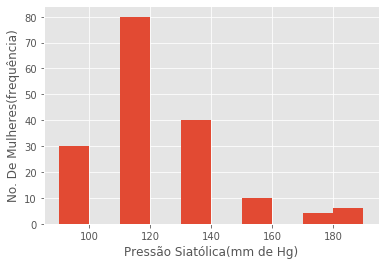

In [16]:
# f) Construa o respectivo histograma.
import matplotlib.pyplot as plt

x = pontoMedioComFrequencia
plt.style.use('ggplot')
plt.hist(x)
plt.ylabel('No. De Mulheres(frequência)') 
plt.xlabel('Pressão Siatólica(mm de Hg)')
plt.show()

## **Questão 2**
#### Analisando os coeficientes de mortalidade geral (por 1000 habitantes) em 50 municípios de um determinado estado, no ano de 2015.

In [17]:
dados = '9 12 10 8 11 13 10 15 9 7 14 12 9 7 15 6 4 16 18 9 19 10 20 13 8 7 17 15 14 20 21 19 22 6 5 12 15 23 19 24 15 10 12 9 15 24 6 24 13 12'
dados = list(map(float, dados.split(" ")))

In [18]:
# Para determinar os intervalos das classes temos:
# Range = Highest Weight - Lowest Weight
numberOfClass = 5
HighestWeight = max(dados)
LowestWeight = min(dados)
rangeClass = HighestWeight - LowestWeight
# Number of class intervals
classInterval = rangeClass/numberOfClass
classInterval

4.0

In [19]:
# Gera os dados, considerando o intervalo de classe.
intervalosCoeficientes = []
value = LowestWeight
for i in range(0, numberOfClass):
  frequenciaCoeficientes = 0
  for element in dados:
    if element >= value and element < (value + classInterval):
      frequenciaCoeficientes += 1
    elif i == (numberOfClass - 1) and element == (value + classInterval):
      frequenciaCoeficientes += 1
  intervalosCoeficientes.append([value, value + classInterval, frequenciaCoeficientes])
  value = value + classInterval
intervalosCoeficientes

[[4.0, 8.0, 8],
 [8.0, 12.0, 12],
 [12.0, 16.0, 16],
 [16.0, 20.0, 6],
 [20.0, 24.0, 8]]

In [20]:
intervalosParaDataframe = []
for i in range(0, len(intervalosCoeficientes)):
  intervalosParaDataframe.append([f'{intervalosCoeficientes[i][0]} |--- {intervalosCoeficientes[i][1]}', intervalosCoeficientes[i][2]])

In [21]:
intervalosParaDataframe

[['4.0 |--- 8.0', 8],
 ['8.0 |--- 12.0', 12],
 ['12.0 |--- 16.0', 16],
 ['16.0 |--- 20.0', 6],
 ['20.0 |--- 24.0', 8]]

### Questão 2: letra A

In [22]:
# a) Construa uma distribuição de frequência com 5 classes
# OBS: considerar 20.0 |---| 24.0

tabelaMortalidade = pd.DataFrame(np.array(intervalosParaDataframe), 
                columns=['Coeficientes_Mortalidade', 'Frequencia'])
tabelaMortalidade

,Coeficientes_Mortalidade,Frequencia
0,4.0 |--- 8.0,8
1,8.0 |--- 12.0,12
2,12.0 |--- 16.0,16
3,16.0 |--- 20.0,6
4,20.0 |--- 24.0,8


In [23]:
[pontosTabela, somaTabela] = destructuringFrequencyTable(tabelaMortalidade, 'Coeficientes_Mortalidade', 'Frequencia')

In [24]:
# OBS: considerar 20.0 |---| 24.0
tabelaMortalidade['Ponto_Medio(xm)'] = pontosTabela['pontoMedio']
tabelaMortalidade['xm_fi'] = pontosTabela['xm_fi']
tabelaMortalidade['xm2'] = pontosTabela['xm2']
tabelaMortalidade['xm2_fi'] = pontosTabela['xm2_fi']
tabelaMortalidade['fac'] = pontosTabela['frequencia_Acumulada']
tabelaMortalidade

,Coeficientes_Mortalidade,Frequencia,Ponto_Medio(xm),xm_fi,xm2,xm2_fi,fac
0,4.0 |--- 8.0,8,6.0,48.0,36.0,288.0,8
1,8.0 |--- 12.0,12,10.0,120.0,100.0,1200.0,20
2,12.0 |--- 16.0,16,14.0,224.0,196.0,3136.0,36
3,16.0 |--- 20.0,6,18.0,108.0,324.0,1944.0,42
4,20.0 |--- 24.0,8,22.0,176.0,484.0,3872.0,50


In [25]:
pontoMedioComFrequencia = []
pontoMedio = pontosTabela['pontoMedio']
frequencia = pontosTabela['frequencia']

for i in range(0, len(pontoMedio)):
  pontoMedioComFrequencia += ([pontoMedio[i]]*frequencia[i])

arr = numpy.array([pontoMedioComFrequencia])

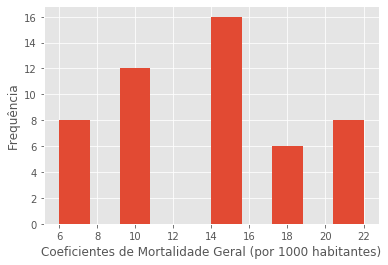

In [26]:
import matplotlib.pyplot as plt

# Histograma
x = pontoMedioComFrequencia
plt.style.use('ggplot')
plt.hist(x)
plt.ylabel('Frequência') 
plt.xlabel('Coeficientes de Mortalidade Geral (por 1000 habitantes)')
plt.show()

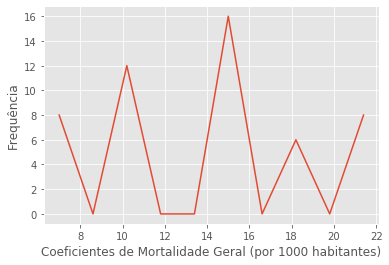

In [27]:
#  Polígono de frequências
counts, bins = np.histogram(pontoMedioComFrequencia)
plt.ylabel('Frequência') 
plt.xlabel('Coeficientes de Mortalidade Geral (por 1000 habitantes)')
plt.plot(bins[:-1]+1, counts)

### Questão 2: letra B

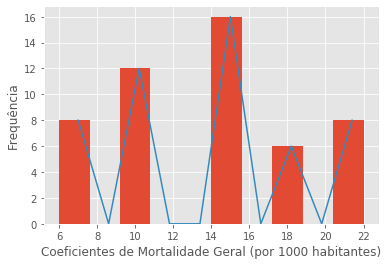

In [28]:
# b) Desenhe o histograma e o polígono de frequências
#  Histograma + Polígono de Frequências

graficos = plt.hist(pontoMedioComFrequencia)
plt.ylabel('Frequência') 
plt.xlabel('Coeficientes de Mortalidade Geral (por 1000 habitantes)')
plt.plot(bins[:-1]+1, counts)    

In [29]:
somaXm_Fi = sum(pontosTabela['xm_fi'])

result = getTendenciaCentral(pontosTabela, somaTabela)
moda = result[0]
mediana = result[1]
media = result[2]

In [30]:
# c) Usando o item a), calcule os coeficientes de mortalidade médio, mediano e modal dos municípios.

# Coeficiente de mortalidade médio
print('--- Coeficiente de mortalidade médio ---')
print(f'Questão 2: letra C parte 1) {media}')

--- Coeficiente de mortalidade médio ---
Questão 2: letra C parte 1) 13.52


In [31]:
# Coeficiente de mortalidade mediano
print('--- Coeficiente de mortalidade mediano ---')
print(f'Questão 2: letra C parte 2) {mediana}')

--- Coeficiente de mortalidade mediano ---
Questão 2: letra C parte 2) 13.25


In [32]:
# Coeficiente de mortalidade modal
print('--- Coeficiente de mortalidade modal ---')
print(f'Questão 2: letra C parte 2) {round(moda, 2)}')

--- Coeficiente de mortalidade modal ---
Questão 2: letra C parte 2) 13.14


### Questão 2: letra C) Coeficiente de mortalidade médio =  13.52

### Questão 2: letra C) Coeficiente de mortalidade mediano = 13.25

### Questão 2: letra C) Coeficiente de mortalidade modal = 13.14